# Correct Wikipedia Entry on Geometric Brownian Motion

It appears the code and accompanying chart on Wikipedia's page for Geometric Brownian motion is incorrect. The following snippet fixes this.

https://en.wikipedia.org/wiki/Geometric_Brownian_motion

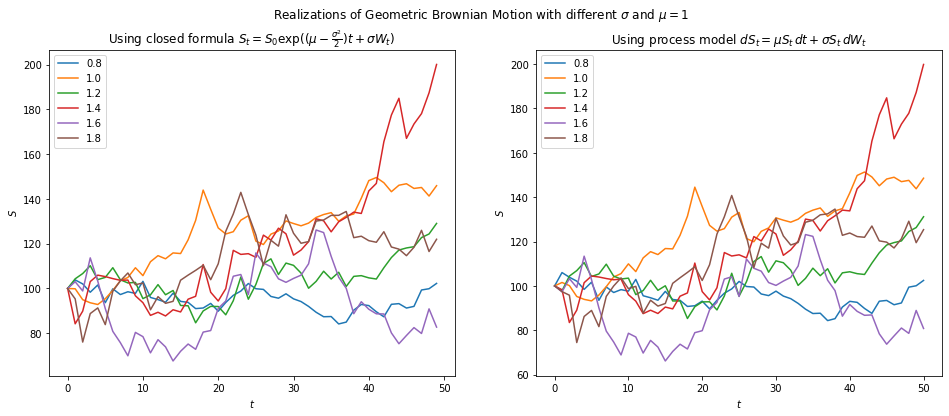

In [1]:
# Python code for plot demonstrating connection
# between solution and process paths.

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

# process parameters
mu = 1
sigmas = np.arange(0.8, 2, 0.2).reshape(6, 1)
S0 = 100

# total time length and granularity
T = 0.1
N = 50

# time increment and vector of time points
dt = T/N
ts = np.linspace(0, T, N).T

# generate weiner process, recall W_t2 = W_t1 + sqrt(t2-t1) * Z
dWtss = np.sqrt(dt) * np.random.normal(0, 1, size=(len(sigmas), N))
Wtss = np.cumsum(dWtss, axis=1)

# using closed formula from above
X = S0 * np.exp((mu - sigmas**2 / 2) * ts + sigmas * Wtss)
# override the initial condition
X[:,0] = S0

# using process model from above (slower)
Y = []
for sigma, dWts in zip(sigmas[:, 0], dWtss):
    y = [S0]
    St = S0
    for dWt in dWts:
        dSt = mu*St*dt + sigma*St*dWt
        St += dSt
        y.append(St)
    Y.append(y)
Y = np.array(Y)

# plot results
fig, axs = plt.subplots(1, 2, figsize=(16,6))
fig.suptitle(r"Realizations of Geometric Brownian Motion with different $\sigma$ and $\mu=1$")
for i, data, title in [
    (0, X.T, r"Using closed formula $S_{t}=S_{0}\exp((\mu -{\frac {\sigma^{2}}{2}}) t+\sigma W_{t})$"),
    (1, Y.T, r"Using process model $dS_{t}=\mu S_{t}\,dt+\sigma S_{t}\,dW_{t}$")
]:
    axs[i].plot(data)
    axs[i].legend(np.round(sigmas[:,0], 2))
    axs[i].set_xlabel("$t$")
    axs[i].set_ylabel("$S$")
    axs[i].set_title(title)


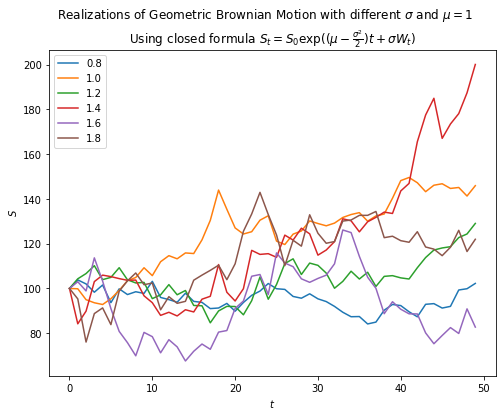

In [2]:
# Python code for the main wikipedia plot.

import pickle
fig2 = pickle.loads(pickle.dumps(fig))
fig2.set_size_inches(8, 6)
fig2.delaxes(fig2.axes[1])
fig2.axes[0].change_geometry(1,1,1)
fig2.set_facecolor("white")
fig2.savefig("GBM3.svg")
fig2

### Possible additional plot demonstrating convergence

In [3]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(1)

# process parameters
mu = 0.05
sigma = 0.25
S0 = 100

# total time length and granularity
T = 1
N = 30

# time increment and vector of time points
dt = T/N
ts = np.linspace(0, T, N).T

# number of independant paths
M = 10000

dWtss = np.sqrt(dt) * np.random.normal(0, 1, size=(M, N))
Wtss = np.cumsum(dWtss, axis=1)

# using closed formula
X = S0 * np.exp((mu - sigma**2 / 2) * ts + sigma * Wtss)
X[:,0] = S0

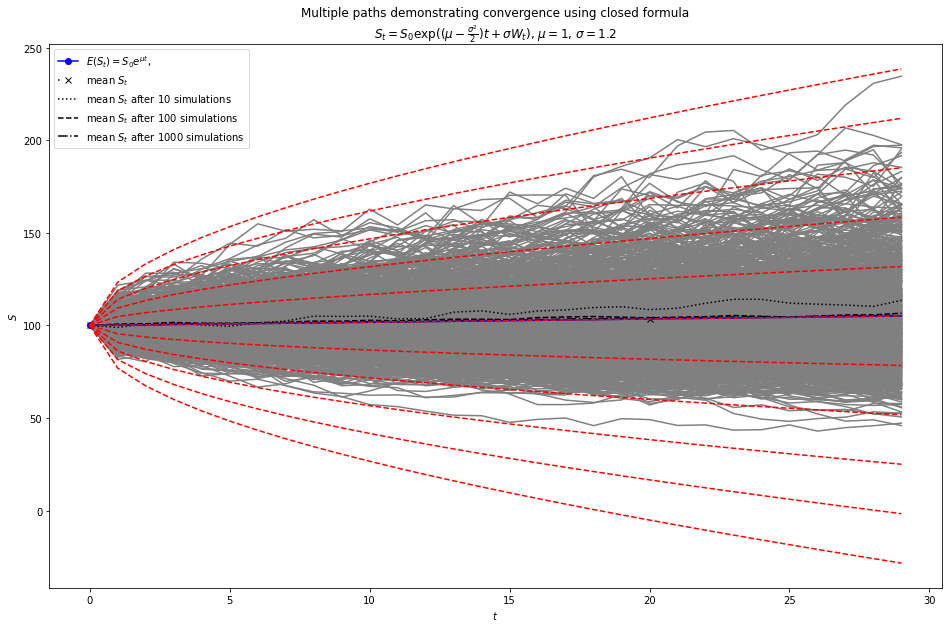

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
#ax.set_yscale('log')

expt_path = S0 * np.exp(mu*ts)
stdev_path = np.sqrt(S0**2 * np.exp(2*mu*ts)*(np.exp(sigma**2*ts)-1))

ax.plot(X.take(np.linspace(0, X.shape[0]-1, 1000).astype(int), axis=0).T, color="gray")
ax_mean_M, = ax.plot(X.mean(axis=0), color="black", linestyle=(0, (1, 20)), marker="x", markevery=20, label=r"mean $S_{t}$")
ax_mean_10, = ax.plot(X[:10, :].mean(axis=0), color="black", linestyle="dotted", label=r"mean $S_{t}$ after 10 simulations")
ax_mean_100, = ax.plot(X[:100, :].mean(axis=0), color="black", linestyle="dashed", label=r"mean $S_{t}$ after 100 simulations")
ax_mean_1000, = ax.plot(X[:1000, :].mean(axis=0), color="black", linestyle="dashdot", label=r"mean $S_{t}$ after 1000 simulations")
ax_soln, = ax.plot(expt_path, color="blue", marker="o", markevery=30, label="$E(S_{t})=S_{0}e^{\mu t},}$")
# add standard deviation lines?
for sd in range(-5, 6):
    ax.plot(expt_path + sd * stdev_path, color="red", linestyle="dashed")
ax.legend(handles=[ax_soln, ax_mean_M, ax_mean_10, ax_mean_100, ax_mean_1000])
ax.set_xlabel("$t$")
ax.set_ylabel("$S$")
ax.set_title("Multiple paths demonstrating convergence using closed formula\n"r"$S_{t}=S_{0}\exp((\mu -{\frac {\sigma^{2}}{2}}) t+\sigma W_{t})$, $\mu=1$, $\sigma=1.2$");